In [177]:
# import...
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

os.chdir("/Users/etmu9498/research/code/scripts-winter2023")
import helper_fns_winter2023
os.chdir("/Users/etmu9498/research/code/scripts-winter2023/cloud-top-height-stats")
import eyewall_metadata
import find_cloud_tops


In [170]:
# general: start by looking at TC sam because this dataset is generally much more well behaved than others.
# then, expand these techniques to other TCs!
year = '2021'
date = '0929'
eye_pass = 1
crlvar = 'WV'

if date == '0926':
    crl_file = 'P3_20210926H1_processed.nc'
    crl_path = "/Users/etmu9498/research/data/crl-all-data-processed/2021/"
    os.chdir(crl_path)
    crl_data = xr.open_dataset(crl_file)
    fl_file = '20210926H1_sam_processed.nc'
    fl_path = "/Users/etmu9498/research/data/in-situ-noaa-processed/2021/"
    os.chdir(fl_path)
    fl_data = xr.open_dataset(fl_file)
    # time limits (different for each day)
    lim0, lim1 =  22.25, 25.75

elif date == '0927':
    crl_file = 'P3_20210927H1_processed.nc'
    crl_path = "/Users/etmu9498/research/data/crl-all-data-processed/2021/"
    os.chdir(crl_path)
    crl_data = xr.open_dataset(crl_file)
    fl_file = '20210927H1_sam_processed.nc'
    fl_path = "/Users/etmu9498/research/data/in-situ-noaa-processed/2021/"
    os.chdir(fl_path)
    fl_data = xr.open_dataset(fl_file)
    # time limits (different for each day)
    lim0, lim1 = 21.6, 25.75

elif date == '0929':
    crl_file = 'P3_20210929H2_processed.nc'
    crl_path = "/Users/etmu9498/research/data/crl-all-data-processed/2021/"
    os.chdir(crl_path)
    crl_data = xr.open_dataset(crl_file)
    fl_file = '20210929H2_sam_processed.nc'
    fl_path = "/Users/etmu9498/research/data/in-situ-noaa-processed/2021/"
    os.chdir(fl_path)
    fl_data = xr.open_dataset(fl_file)
    # time limits (different for each day)
    lim0, lim1 = 21.25, 26.2


In [171]:
# goal 1: better characterize the thermodynamic environments within each TC eye using CRL and flight level data.

In [172]:
# 1.1 (start here): calculate the average temperature / water vapor from each flight level leg through a TC. Then,
# calculate the temperature / moisture anomaly... potentially more important

# 1.2: use compositing to find average T, wv, and anomalies at *multiple levels* using CRL data. This method may struggle 
# from a lack of data at every level

In [173]:
# print out datasets
# fl_data

In [174]:
# make simple plots of crl and fl data

# setup info
lw = 2
fs = 18
use_limit = True
zoom = False
crllim0 = np.nanargmin( np.abs(crl_data.time - lim0 ))
crllim1 = np.nanargmin( np.abs(crl_data.time - lim1 ))
fllim0 = np.nanargmin( np.abs(fl_data.time - lim0 ))
fllim1 = np.nanargmin( np.abs(fl_data.time - lim1 ))

# next goal: get mean values just within CRL eye limits
metadata = eyewall_metadata.all_metadata()
lims = metadata[year]['eyewall_limits'][date][eye_pass]
eyelim0, eyelim1 = lims[0], lims[1]
crleyelim0 = np.nanargmin( np.abs(crl_data.time - eyelim0 ))
crleyelim1 = np.nanargmin( np.abs(crl_data.time - eyelim1 ))
fleyelim0 = np.nanargmin( np.abs(fl_data.time - eyelim0 ))
fleyelim1 = np.nanargmin( np.abs(fl_data.time - eyelim1 ))

print(crleyelim0)
print(crleyelim1)

# zoom in or not:
if zoom:
    crllim0, crllim1 = crleyelim0, crleyelim1
    fllim0, fllim1 = fleyelim0, fleyelim1

# choose which variable to look at
if crlvar == 'T':
    crlfield = crl_data.T[ crllim0:crllim1, :].transpose()
    flfield = fl_data['TA.d'][fllim0:fllim1]
    ylabel = "T (C)"
    ylabel_mean = "T Mean (C)"
    ylabel_anom = "T Anomaly (C)"
    vmax = 30
elif crlvar == 'WV':
    crlfield = crl_data.WVMR[ crllim0:crllim1, :].transpose()
    flfield = fl_data['MR.d'][fllim0:fllim1]
    ylabel = "WVMR (g/kg)"
    ylabel_mean = "WVMR Mean (g/kg)"
    ylabel_anom = "WVMR Anomaly (g/kg)"
    vmax = 20

layer_avg_temp = np.nanmean( crlfield, axis = 1)
# make an array of average temperatures within the correct bounds. A matrix
crlmean = np.ones_like( crlfield)
for i in range( crllim1 - crllim0):
    crlmean[:, i] = crlmean[:, i] * layer_avg_temp
crlanom = crlfield - crlmean


2873
3033


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\2232801443.py:46: RuntimeWarning: Mean of empty slice
  layer_avg_temp = np.nanmean( crlfield, axis = 1)


Text(0.5, 0, 'Time (Hours, UTC)')

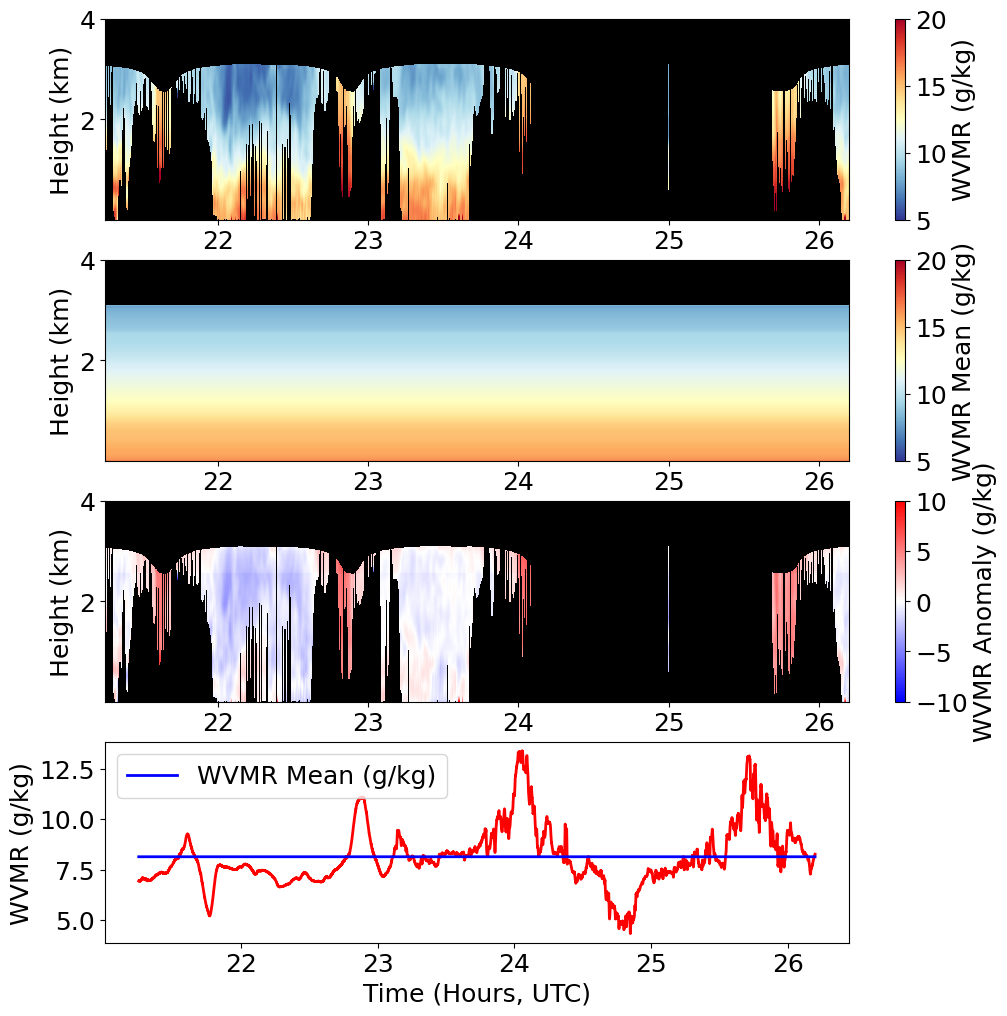

In [175]:
# make figure
plt.figure(figsize=(12,12))
helper_fns_winter2023.change_font_sizes(fs, fs)

plt.subplot(411)
color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_data.time[crllim0:crllim1], crl_data.height / 1000, crlfield, cmap = color_map, vmin=5, vmax=vmax)
cbar = plt.colorbar()
cbar.ax.set_ylabel( ylabel=ylabel)
cbar.ax.tick_params(labelsize=fs)
plt.ylabel( 'Height (km)')
ax = plt.gca()
ax.set_facecolor('k')
# if use_limit:
#     plt.xlim([lim0, lim1])

# field mean
plt.subplot(412)

color_map = plt.cm.get_cmap( "RdYlBu").reversed()
plt.pcolormesh( crl_data.time[crllim0:crllim1], crl_data.height / 1000, crlmean, cmap = color_map, vmin=5, vmax=vmax)
cbar = plt.colorbar()
cbar.ax.set_ylabel( ylabel=ylabel_mean)
cbar.ax.tick_params(labelsize=fs)
plt.ylabel( 'Height (km)')
ax = plt.gca()
ax.set_facecolor('k')
#if use_limit:
#    plt.xlim([lim0, lim1])

# field anomaly
plt.subplot(413)
divnorm = colors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)
plt.pcolormesh( crl_data.time[crllim0:crllim1], crl_data.height / 1000, crlanom, cmap = 'bwr', norm=divnorm )
cbar = plt.colorbar()
cbar.ax.set_ylabel( ylabel=ylabel_anom)
cbar.ax.tick_params(labelsize=fs)
plt.ylabel( 'Height (km)')
ax = plt.gca()
ax.set_facecolor('k')
#if use_limit:
#    plt.xlim([lim0, lim1])

    
plt.subplot(414)
flmean = np.nanmean(flfield)
flmean = flmean * np.ones( len(flfield))

plt.plot( fl_data.time[fllim0:fllim1], flfield, c='r', linewidth=lw)
plt.plot( fl_data.time[fllim0:fllim1], flmean, c='b', linewidth=lw, label=ylabel_mean)
plt.legend(loc='upper left')
helper_fns_winter2023.add_blank_colorbar()
plt.ylabel(ylabel)
plt.xlabel("Time (Hours, UTC)")


In [198]:
# semi automate the code above to find CRL mean temperatures and anomalies for every eye!
# repeat for every fl data pass

# cases for loops below
crlvar = ['T', 'WV']
dates = ['0926', '0926', '0926', '0927', '0927', '0929', '0929']
passes = [0, 1, 2, 0, 1, 0, 1]

# store data here
T_crl_mean_eye = []
T_crl_mean_total = []
T_fl_mean_eye = []
T_fl_mean_total = []

WV_crl_mean_eye = []
WV_crl_mean_total = []
WV_fl_mean_eye = []
WV_fl_mean_total = []

cloudheights = []

# go through every eye pass for both variables
for crlvar in crlvar:
    print('Variable: ' + str( crlvar))
    
    for i, date in enumerate( dates):        
        # metadata
        year = '2021'
        eye_pass = passes[i]
        print("Date " + date + ", pass " + str(eye_pass))

        if date == '0926':
            crl_file = 'P3_20210926H1_processed.nc'
            crl_path = "/Users/etmu9498/research/data/crl-all-data-processed/2021/"
            fl_file = '20210926H1_sam_processed.nc'
            fl_path = "/Users/etmu9498/research/data/in-situ-noaa-processed/2021/"
            # time limits (different for each day)
            lim0, lim1 =  22.25, 25.75
        elif date == '0927':
            crl_file = 'P3_20210927H1_processed.nc'
            crl_path = "/Users/etmu9498/research/data/crl-all-data-processed/2021/"
            fl_file = '20210927H1_sam_processed.nc'
            fl_path = "/Users/etmu9498/research/data/in-situ-noaa-processed/2021/"
            # time limits (different for each day)
            lim0, lim1 = 21.6, 25.75
        elif date == '0929':
            crl_file = 'P3_20210929H2_processed.nc'
            crl_path = "/Users/etmu9498/research/data/crl-all-data-processed/2021/"
            fl_file = '20210929H2_sam_processed.nc'
            fl_path = "/Users/etmu9498/research/data/in-situ-noaa-processed/2021/"
            # time limits (different for each day)
            lim0, lim1 = 21.25, 26.2
        # load data
        os.chdir(crl_path)
        crl_data = xr.open_dataset(crl_file)
        os.chdir(fl_path)
        fl_data = xr.open_dataset(fl_file)

        # Part 1: full dataset means

        # limits for full dataset (make sure they cover the same time period)
        crllim0 = np.nanargmin( np.abs(crl_data.time - lim0 ))
        crllim1 = np.nanargmin( np.abs(crl_data.time - lim1 ))
        fllim0 = np.nanargmin( np.abs(fl_data.time - lim0 ))
        fllim1 = np.nanargmin( np.abs(fl_data.time - lim1 ))
        # choose which variable to look at
        if crlvar == 'T':
            crlfield = crl_data.T[ crllim0:crllim1, :].transpose()
            flfield = fl_data['TA.d'][fllim0:fllim1]
        elif crlvar == 'WV':
            crlfield = crl_data.WVMR[ crllim0:crllim1, :].transpose()
            flfield = fl_data['MR.d'][fllim0:fllim1]

        # get mean crl and fl data for all valid locations and add to correct list
        crlmean = np.nanmean( crlfield, axis = 1)
        flmean = np.nanmean(flfield)
        if crlvar == "T":
            T_crl_mean_total.append( crlmean)
            T_fl_mean_total.append( flmean)
        elif crlvar == "WV":
            WV_crl_mean_total.append( crlmean)
            WV_fl_mean_total.append( flmean)

        # next goal: get mean values just within CRL eye limits
        # setup
        metadata = eyewall_metadata.all_metadata()
        lims = metadata[year]['eyewall_limits'][date][eye_pass]
        eyelim0, eyelim1 = lims[0], lims[1]
        crleyelim0 = np.nanargmin( np.abs(crl_data.time - eyelim0 ))
        crleyelim1 = np.nanargmin( np.abs(crl_data.time - eyelim1 ))
        fleyelim0 = np.nanargmin( np.abs(fl_data.time - eyelim0 ))
        fleyelim1 = np.nanargmin( np.abs(fl_data.time - eyelim1 ))
        if crlvar == 'T':
            crlfield = crl_data.T[ crleyelim0:crleyelim1, :].transpose()
            flfield = fl_data['TA.d'][fleyelim0:fleyelim1]
        elif crlvar == 'WV':
            crlfield = crl_data.WVMR[ crleyelim0:crleyelim1, :].transpose()
            flfield = fl_data['MR.d'][fleyelim0:fleyelim1]
        crlmean = np.nanmean( crlfield, axis = 1)
        flmean = np.nanmean(flfield)
        if crlvar == "T":
            T_crl_mean_eye.append( crlmean)
            T_fl_mean_eye.append( flmean)
        elif crlvar == "WV":
            WV_crl_mean_eye.append( crlmean)
            WV_fl_mean_eye.append( flmean)
        
            # find and add cloud heights too!
            H = crl_data.height
            power = crl_data.P_ch1[ crleyelim0:crleyelim1, :]
            axis = crl_data.time[ crleyelim0:crleyelim1]
            p3_height = crl_data.p3_height[ crleyelim0:crleyelim1]

            # get cloud heights and clusters
            ch, cloudtime = find_cloud_tops.find_cloud_heights( H, power, axis, p3_height, cutoff_power = -30)
            cloudheights.append(ch)


Variable: T
Date 0926, pass 0
Date 0926, pass 1


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:75: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:99: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)


Date 0926, pass 2
Date 0927, pass 0
Date 0927, pass 1
Date 0929, pass 0
Date 0929, pass 1
Variable: WV
Date 0926, pass 0
Date 0926, pass 1
Date 0926, pass 2


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:75: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:99: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:75: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:99: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)


Date 0927, pass 0
Date 0927, pass 1


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:75: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:99: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:75: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:99: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)


Date 0929, pass 0


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:75: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:99: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)


Date 0929, pass 1


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:75: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_15952\1144048575.py:99: RuntimeWarning: Mean of empty slice
  crlmean = np.nanmean( crlfield, axis = 1)


[9.652467, 9.652467, 9.652467, 9.385856, 9.385856, 9.243368, 9.243368]
[15.150804, 20.087864, 14.318295, 16.345856, 16.295195, 15.057284, 15.569626]
[9.171095, 9.171095, 9.171095, 8.930643, 8.930643, 8.138628, 8.138628]
[12.003736, 10.450896, 10.366997, 11.9613495, 12.772482, 8.639239, 10.28076]
[1688.6826824164075, 1330.823319027346, 938.5588325546256, 1118.7659692454113, 1085.9683293896753, 1731.907776509083, 1708.7285581082674]
[695.9956386983638, 647.4013332564666, 729.6482480491094, 884.7815122165016, 850.8389446360611, 767.7996604391572, 725.743676558445]


Text(0, 0.5, 'Cloud Height Standard Dev. (m)')

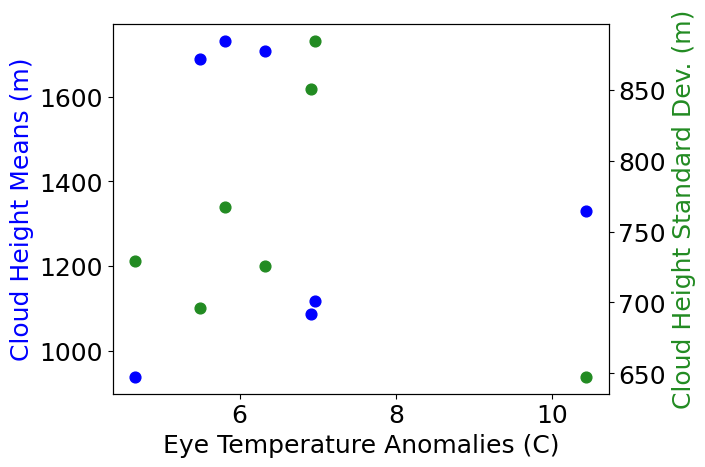

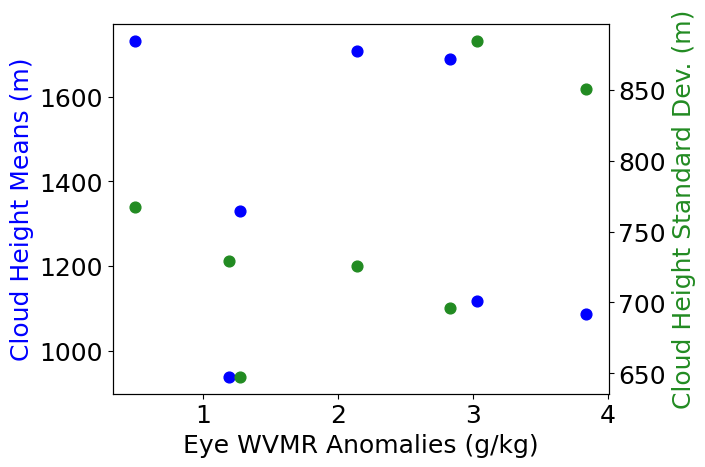

In [219]:
print(T_fl_mean_total)
print(T_fl_mean_eye)
print(WV_fl_mean_total)
print(WV_fl_mean_eye)

T_anom = np.array(T_fl_mean_eye) - np.array(T_fl_mean_total)
WV_anom = np.array(WV_fl_mean_eye) - np.array(WV_fl_mean_total)

means = []
stds = []
for heights in cloudheights:
    means.append( np.nanmean(heights))
    stds.append(np.std(heights))
    
    # plt.figure()
    # plt.plot(heights)

print(means)
print(stds)

plt.figure()
plt.scatter( T_anom, means, c='b', label ='Mean H.', s=60)
plt.xlabel("Eye Temperature Anomalies (C)")
plt.ylabel("Cloud Height Means (m)", c='b')

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter( T_anom, stds, c='forestgreen', label ='Standard Dev.', s=60)
plt.ylabel("Cloud Height Standard Dev. (m)", c='forestgreen')

plt.figure()
plt.scatter( WV_anom, means, c='b', label ='Mean H.', s=60)
plt.xlabel("Eye WVMR Anomalies (g/kg)")
plt.ylabel("Cloud Height Means (m)", c='b')

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter( WV_anom, stds, c='forestgreen', label ='Standard Dev.', s=60)
plt.ylabel("Cloud Height Standard Dev. (m)", c='forestgreen')

7
667
(7, 667)


(0.0, 4.0)

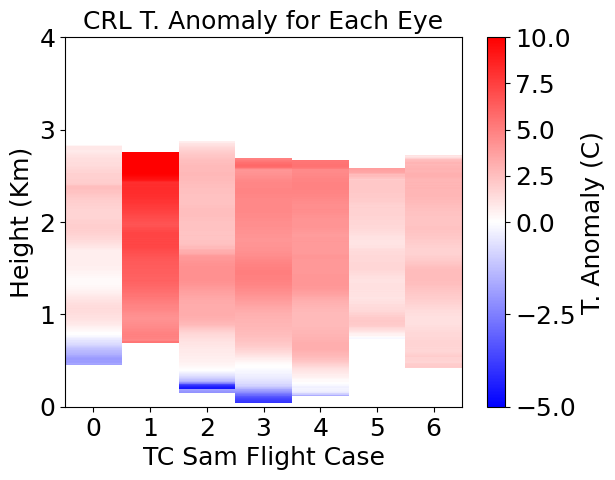

In [216]:
# exploring crl mean profiles!

print(len(T_crl_mean_eye))
print(len(T_crl_mean_eye[0]))

#for i in range(len(T_crl_mean_eye[0])):
#    print(T_crl_mean_total[0][i])
#    print(str(T_crl_mean_eye[0][i]) + '\n')
 
# convert lists to arrays
T_crl_mean_eye = np.array(T_crl_mean_eye)
T_crl_mean_total = np.array(T_crl_mean_total)
T_crl_anom = T_crl_mean_eye - T_crl_mean_total

print(np.shape(T_crl_anom))

divnorm = colors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=10)
plt.pcolormesh( range(7), crl_data.height / 1000, T_crl_anom.transpose(), cmap = 'bwr', norm=divnorm)
plt.colorbar(label='T. Anomaly (C)')
plt.title("CRL T. Anomaly for Each Eye")
plt.xticks(range(7))
plt.xlabel("TC Sam Flight Case")
plt.ylabel("Height (Km)")
plt.ylim([0, 4])